## Dataset: "Cleaned_Sales_Transactions_3500.csv"
it was exported from Day-2 notebook.

## Task: Revenue Analysis & Observations

importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Loading Dataset

In [3]:
df = pd.read_csv("Cleaned_Sales_Transactions_3500.csv")

Dataset Inspection

In [4]:
df.head()

,OrderID,CustomerID,Gender,Age,Product,Category,Quantity,Price,TotalAmount,PaymentMethod,Region,PurchaseDate,Age_Group
0,O00001,C0435,Female,59.0,T-shirt,Fashion,1,369.82,369.82,MobileMoney,East,2025-03-30,56+
1,O00002,C1337,Female,19.0,Jacket,Fashion,2,232.29,464.58,BankTransfer,North,2025-04-11,18-25
2,O00003,C0619,Male,28.0,Lipstick,Beauty,1,347.79,347.79,Cash,East,2024-07-14,26-35
3,O00004,C0033,Female,58.0,Vacuum Cleaner,Home,5,336.92,1684.60,Card,North,2024-05-24,56+
4,O00005,C1199,Male,25.0,Smartphone,Electronics,1,85.37,85.37,MobileMoney,South,2025-05-10,18-25


In [5]:
df.tail()

,OrderID,CustomerID,Gender,Age,Product,Category,Quantity,Price,TotalAmount,PaymentMethod,Region,PurchaseDate,Age_Group
3495,O03496,C1003,Male,45.0,T-shirt,Fashion,5,99.01,495.05,Cash,East,2025-06-20,36-45
3496,O03497,C0217,Male,57.0,Tablet,Electronics,4,332.44,1329.76,BankTransfer,North,2023-12-28,56+
3497,O03498,C0728,Female,58.0,Lotion,Beauty,3,397.95,1193.85,Cash,East,2024-09-19,56+
3498,O03499,C0237,Male,48.0,Blender,Home,1,43.70,43.70,Card,East,2025-03-07,46-55
3499,O03500,C1349,Female,39.0,Perfume,Beauty,4,12.21,48.84,BankTransfer,West,2025-07-02,36-45


In [6]:
print("Total Rows:", df.shape[0])
print("Total Columns:", df.shape[1])

Total Rows: 3500
Total Columns: 13


In [7]:
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
OrderID          0
CustomerID       0
Gender           0
Age              0
Product          0
Category         0
Quantity         0
Price            0
TotalAmount      0
PaymentMethod    0
Region           0
PurchaseDate     0
Age_Group        0
dtype: int64


In [8]:
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 0


In [9]:
df.dtypes

OrderID           object
CustomerID        object
Gender            object
Age              float64
Product           object
Category          object
Quantity           int64
Price            float64
TotalAmount      float64
PaymentMethod     object
Region            object
PurchaseDate      object
Age_Group         object
dtype: object

In [10]:
print(df.columns.tolist())

['OrderID', 'CustomerID', 'Gender', 'Age', 'Product', 'Category', 'Quantity', 'Price', 'TotalAmount', 'PaymentMethod', 'Region', 'PurchaseDate', 'Age_Group']


Analyzing Revenue Distribution Across Regions

Revenue distributed across regions:
  Region  TotalAmount
3   West    668785.33
0   East    652270.37
2  South    647359.17
1  North    641732.68


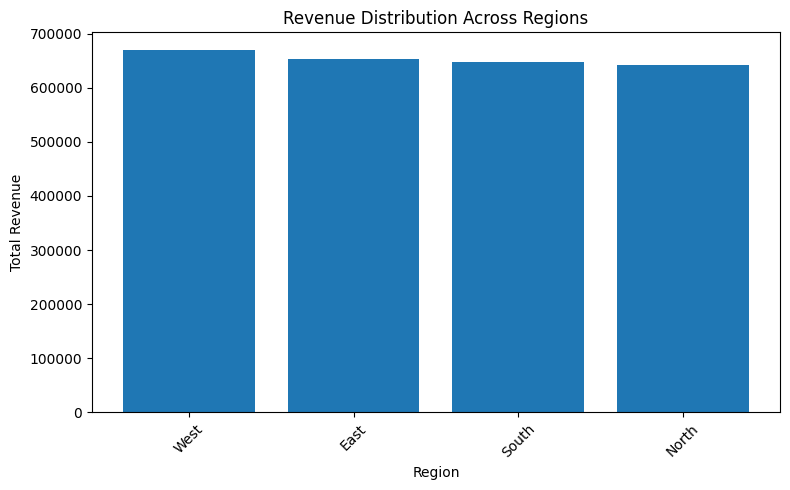

In [11]:
# Group by Region and sum up TotalAmount
region_revenue = df.groupby('Region')['TotalAmount'].sum().reset_index()

# Sort by revenue for clearer visualization
region_revenue = region_revenue.sort_values(by='TotalAmount', ascending=False)

print("Revenue distributed across regions:")
print(region_revenue)

# Visualization
plt.figure(figsize=(8,5))
plt.bar(region_revenue['Region'], region_revenue['TotalAmount'])
plt.title("Revenue Distribution Across Regions")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

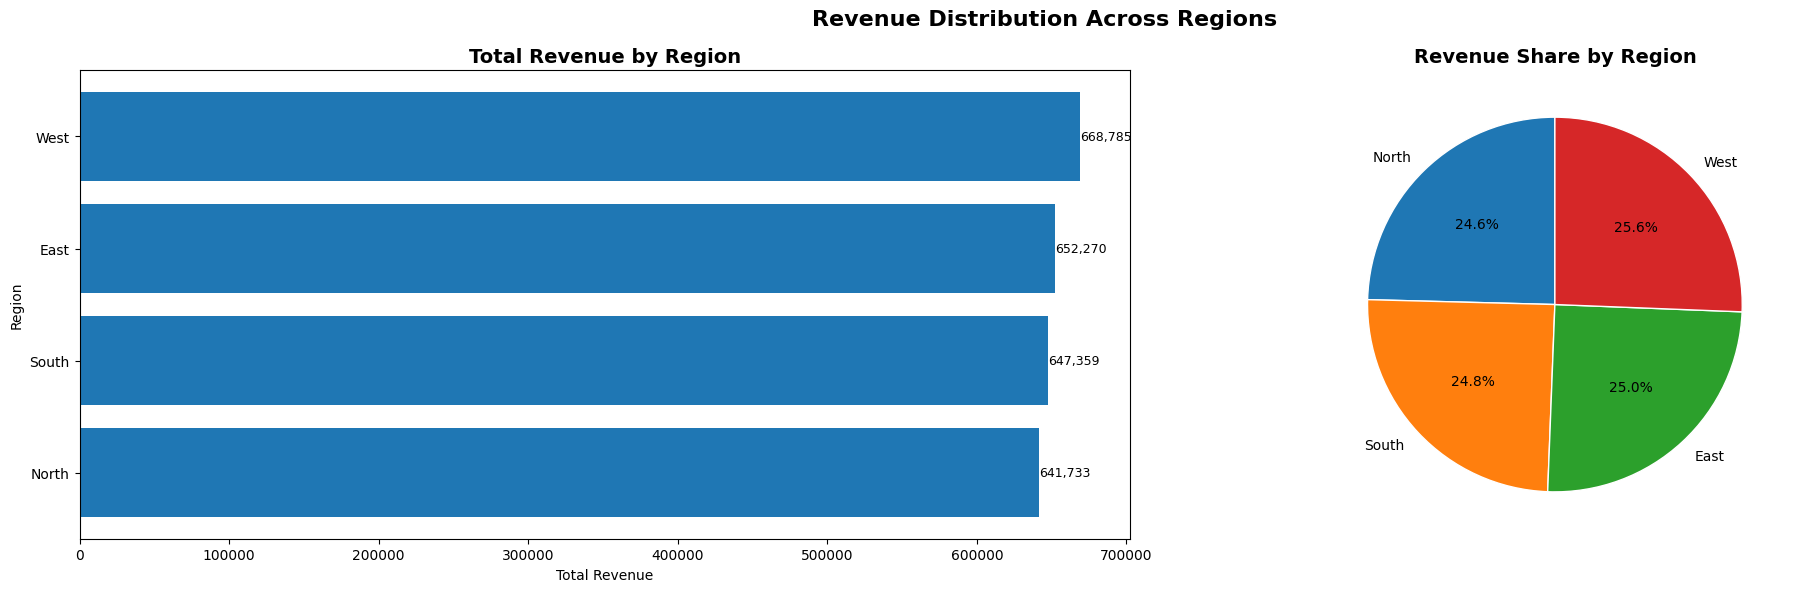

In [12]:
# Group by Region and sum up TotalAmount
region_revenue = df.groupby('Region')['TotalAmount'].sum().reset_index()
region_revenue = region_revenue.sort_values(by='TotalAmount', ascending=True)

# Create a 1x2 subplot layout
fig, axes = plt.subplots(1, 2, figsize=(21,6))

# --- Visualization 1: Horizontal Bar Chart ---
axes[0].barh(region_revenue['Region'], region_revenue['TotalAmount'])
axes[0].set_title("Total Revenue by Region", fontsize=14, weight='bold')
axes[0].set_xlabel("Total Revenue")
axes[0].set_ylabel("Region")

# Add value labels
for index, value in enumerate(region_revenue['TotalAmount']):
    axes[0].text(value, index, f'{value:,.0f}', va='center', fontsize=9)

# --- Visualization 2: Pie Chart ---
axes[1].pie(
    region_revenue['TotalAmount'],
    labels=region_revenue['Region'],
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'edgecolor': 'white'}
)
axes[1].set_title("Revenue Share by Region", fontsize=14, weight='bold')

plt.suptitle("Revenue Distribution Across Regions", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


Average Revenue per Transaction by Region

Average revenue per transaction by region:
  Region  TotalAmount
3   West   765.200606
0   East   760.221876
1  North   732.571553
2  South   725.738980


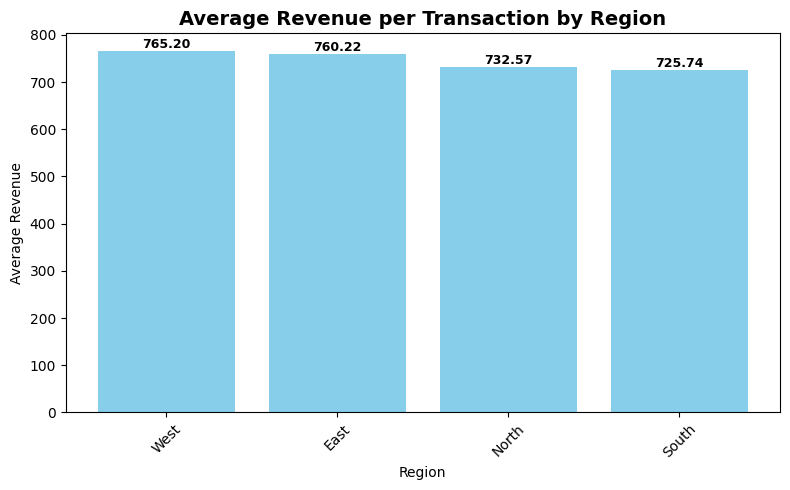

In [13]:
# Calculating average revenue per transaction by region
avg_revenue_region = (
    df.groupby('Region')['TotalAmount']
    .mean()
    .reset_index()
    .sort_values(by='TotalAmount', ascending=False)
)

print("Average revenue per transaction by region:")
print(avg_revenue_region)

# Visualization
plt.figure(figsize=(8,5))
bars = plt.bar(avg_revenue_region['Region'], avg_revenue_region['TotalAmount'], color='skyblue')

plt.title("Average Revenue per Transaction by Region", fontsize=14, weight='bold')
plt.xlabel("Region")
plt.ylabel("Average Revenue")
plt.xticks(rotation=45)

# Adding value labels on each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2, 
        height, 
        f'{height:,.2f}',  # formatted to 2 decimal places
        ha='center', 
        va='bottom', 
        fontsize=9, 
        weight='bold'
    )

plt.tight_layout()
plt.show()

Interpretation:

Some regions may not have the highest total sales but show a higher average revenue per transaction, indicating fewer but higher-value purchases.

Revenue by Region & Category (Stacked Bar)

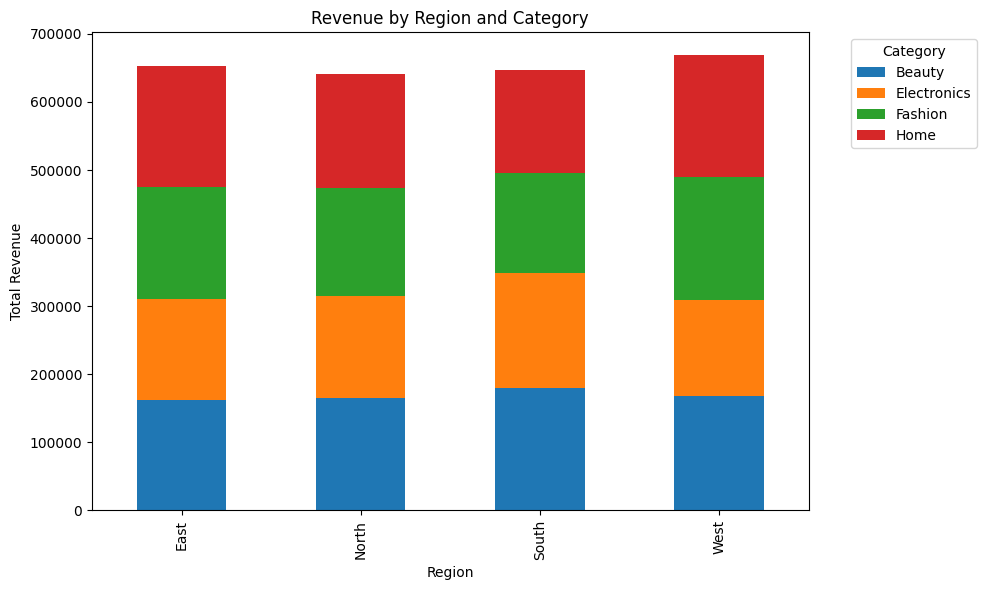

In [14]:
region_category_revenue = df.groupby(['Region', 'Category'])['TotalAmount'].sum().unstack().fillna(0)

# Visualization
region_category_revenue.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Revenue by Region and Category")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.legend(title="Category", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


Interpretation:

This shows product mix differences among regions.
For instance, the North may sell mostly electronics, while the East focuses on clothing — giving direction for region-specific marketing.

Regional Revenue Spread (Boxplot)

<Figure size 800x500 with 0 Axes>

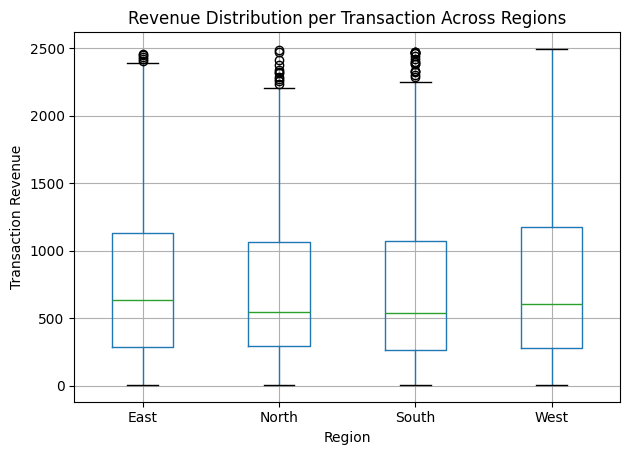

In [15]:
plt.figure(figsize=(8,5))
df.boxplot(column='TotalAmount', by='Region')
plt.title("Revenue Distribution per Transaction Across Regions")
plt.suptitle("")  
plt.xlabel("Region")
plt.ylabel("Transaction Revenue")
plt.tight_layout()
plt.show()

Interpretation:

If some regions have a wide spread or high outliers, it means they have both small and very high-value transactions — suggesting diverse customer segments.

Revenue Trend Over Time by Region

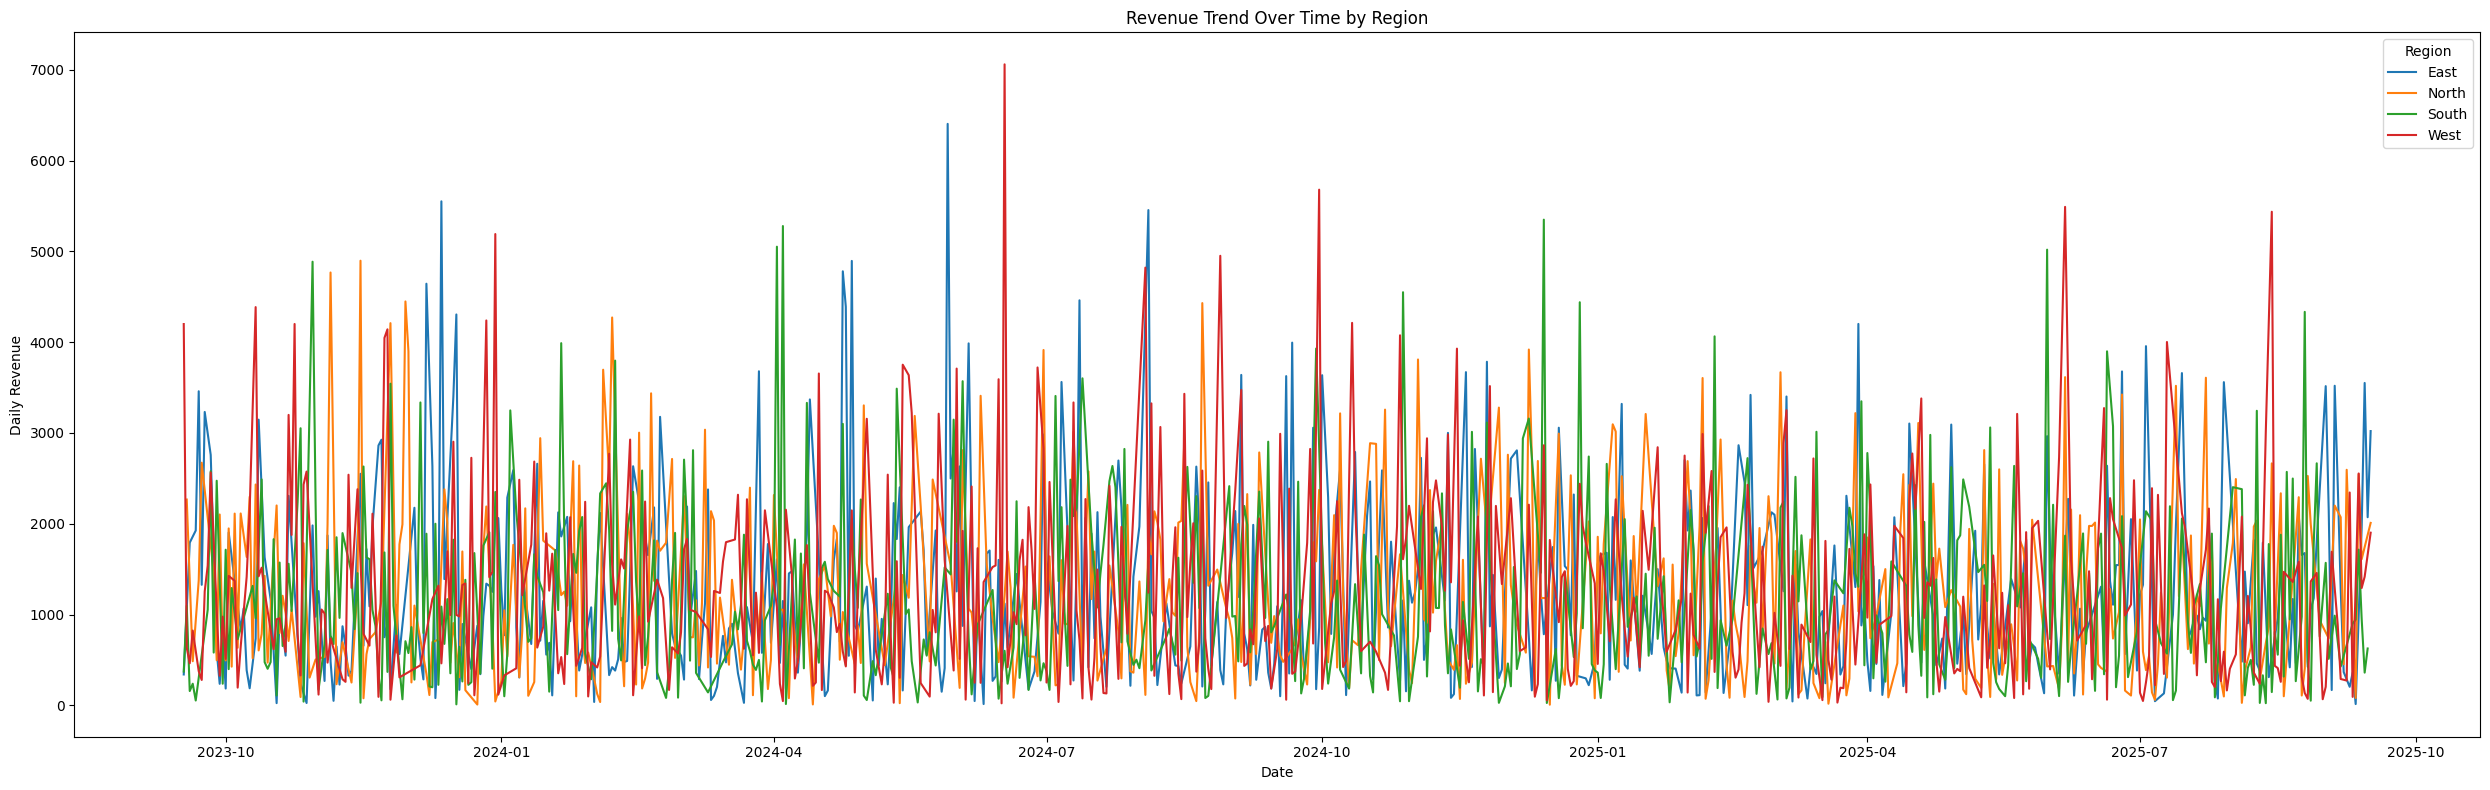

In [16]:
# Convert to datetime if not already
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])

# Group by date and region
time_region_revenue = df.groupby(['PurchaseDate', 'Region'])['TotalAmount'].sum().reset_index()

plt.figure(figsize=(25,8))
for region in df['Region'].unique():
    region_data = time_region_revenue[time_region_revenue['Region'] == region]
    plt.plot(region_data['PurchaseDate'], region_data['TotalAmount'], label=region)

plt.title("Revenue Trend Over Time by Region")
plt.xlabel("Date")
plt.ylabel("Daily Revenue")
plt.legend(title="Region")
plt.tight_layout()
plt.show()

Interpretation:

This trend reveals seasonality or campaign impact.
Spikes may correspond to promotional periods or festivals, helping plan future sales campaigns.

Donut Chart — Percentage Contribution of Each Region to Total Revenue

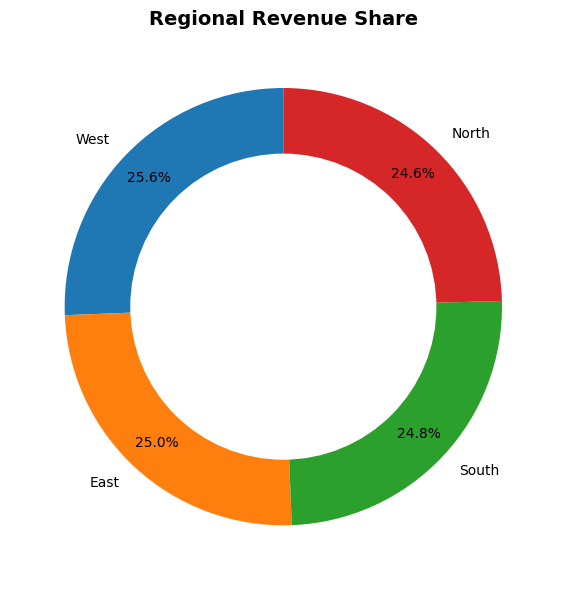

In [17]:
region_revenue = df.groupby('Region')['TotalAmount'].sum().reset_index().sort_values(by='TotalAmount', ascending=False)

# Donut chart
plt.figure(figsize=(6,6))
plt.pie(
    region_revenue['TotalAmount'],
    labels=region_revenue['Region'],
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85
)

# Draw a circle in the center to create a donut effect
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Regional Revenue Share", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


Interpretation:

This clearly shows which region contributes the most to overall revenue and how balanced the revenue distribution is across markets.

Bubble Chart — Average Revenue vs. Quantity Sold per Region

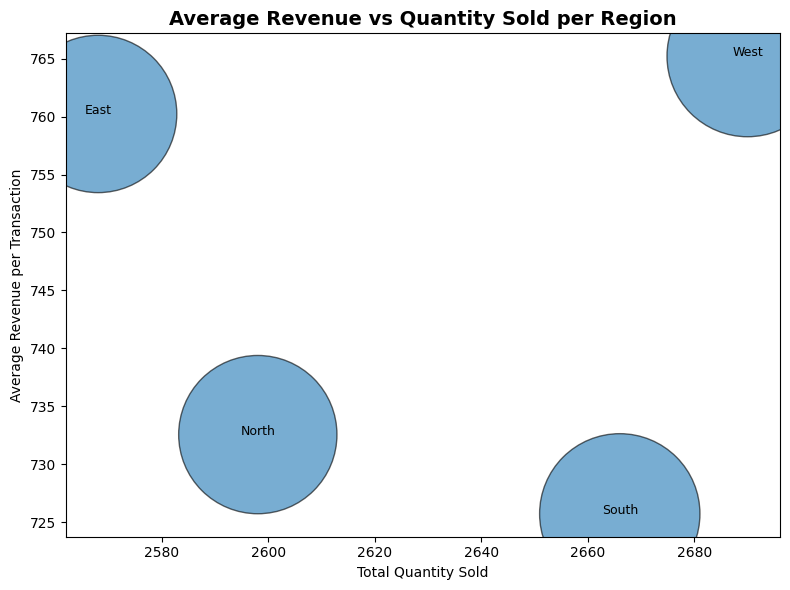

In [18]:
region_stats = df.groupby('Region').agg({
    'TotalAmount': 'mean',
    'Quantity': 'sum'
}).reset_index()

plt.figure(figsize=(8,6))
plt.scatter(
    region_stats['Quantity'],
    region_stats['TotalAmount'],
    s=region_stats['Quantity']*5,  # bubble size reflects quantity sold
    alpha=0.6,
    edgecolors='black'
)

for i in range(len(region_stats)):
    plt.text(region_stats['Quantity'][i], region_stats['TotalAmount'][i], region_stats['Region'][i], fontsize=9, ha='center')

plt.title("Average Revenue vs Quantity Sold per Region", fontsize=14, weight='bold')
plt.xlabel("Total Quantity Sold")
plt.ylabel("Average Revenue per Transaction")
plt.tight_layout()
plt.show()


Interpretation:

Large bubbles show regions with high sales volume.

High vertical placement indicates higher average revenue per transaction.

The top-right region (largest, highest bubble) is your top performer.

Heatmap — Revenue by Region and Category

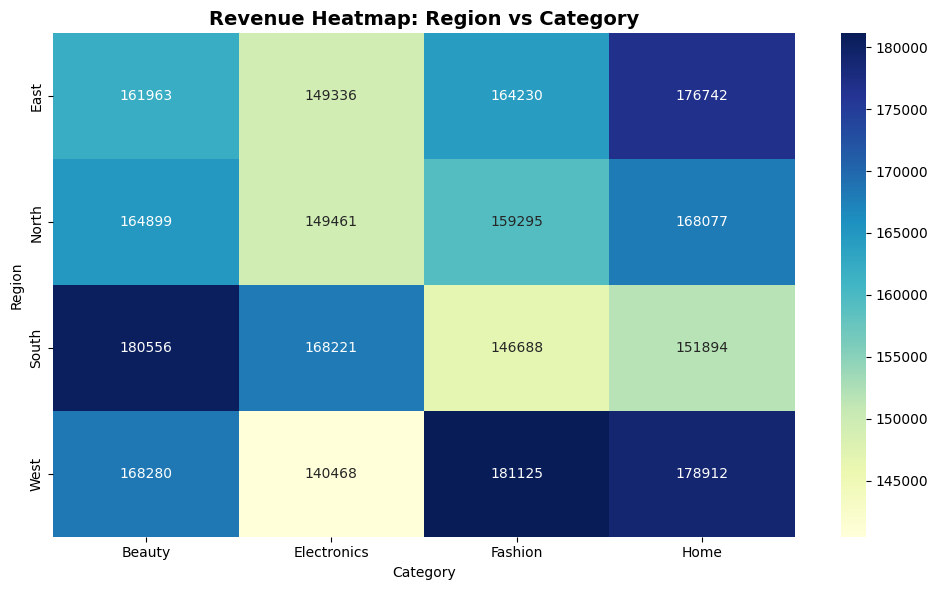

In [21]:
region_category = df.groupby(['Region', 'Category'])['TotalAmount'].sum().unstack().fillna(0)

plt.figure(figsize=(10,6))
sns.heatmap(region_category, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title("Revenue Heatmap: Region vs Category", fontsize=14, weight='bold')
plt.xlabel("Category")
plt.ylabel("Region")
plt.tight_layout()
plt.show()

Interpretation:

Darker cells indicate strong revenue combinations.

Instantly shows which region-category pairs are thriving or need improvement.

## 4-in-1 Revenue Dashboard with Annotations

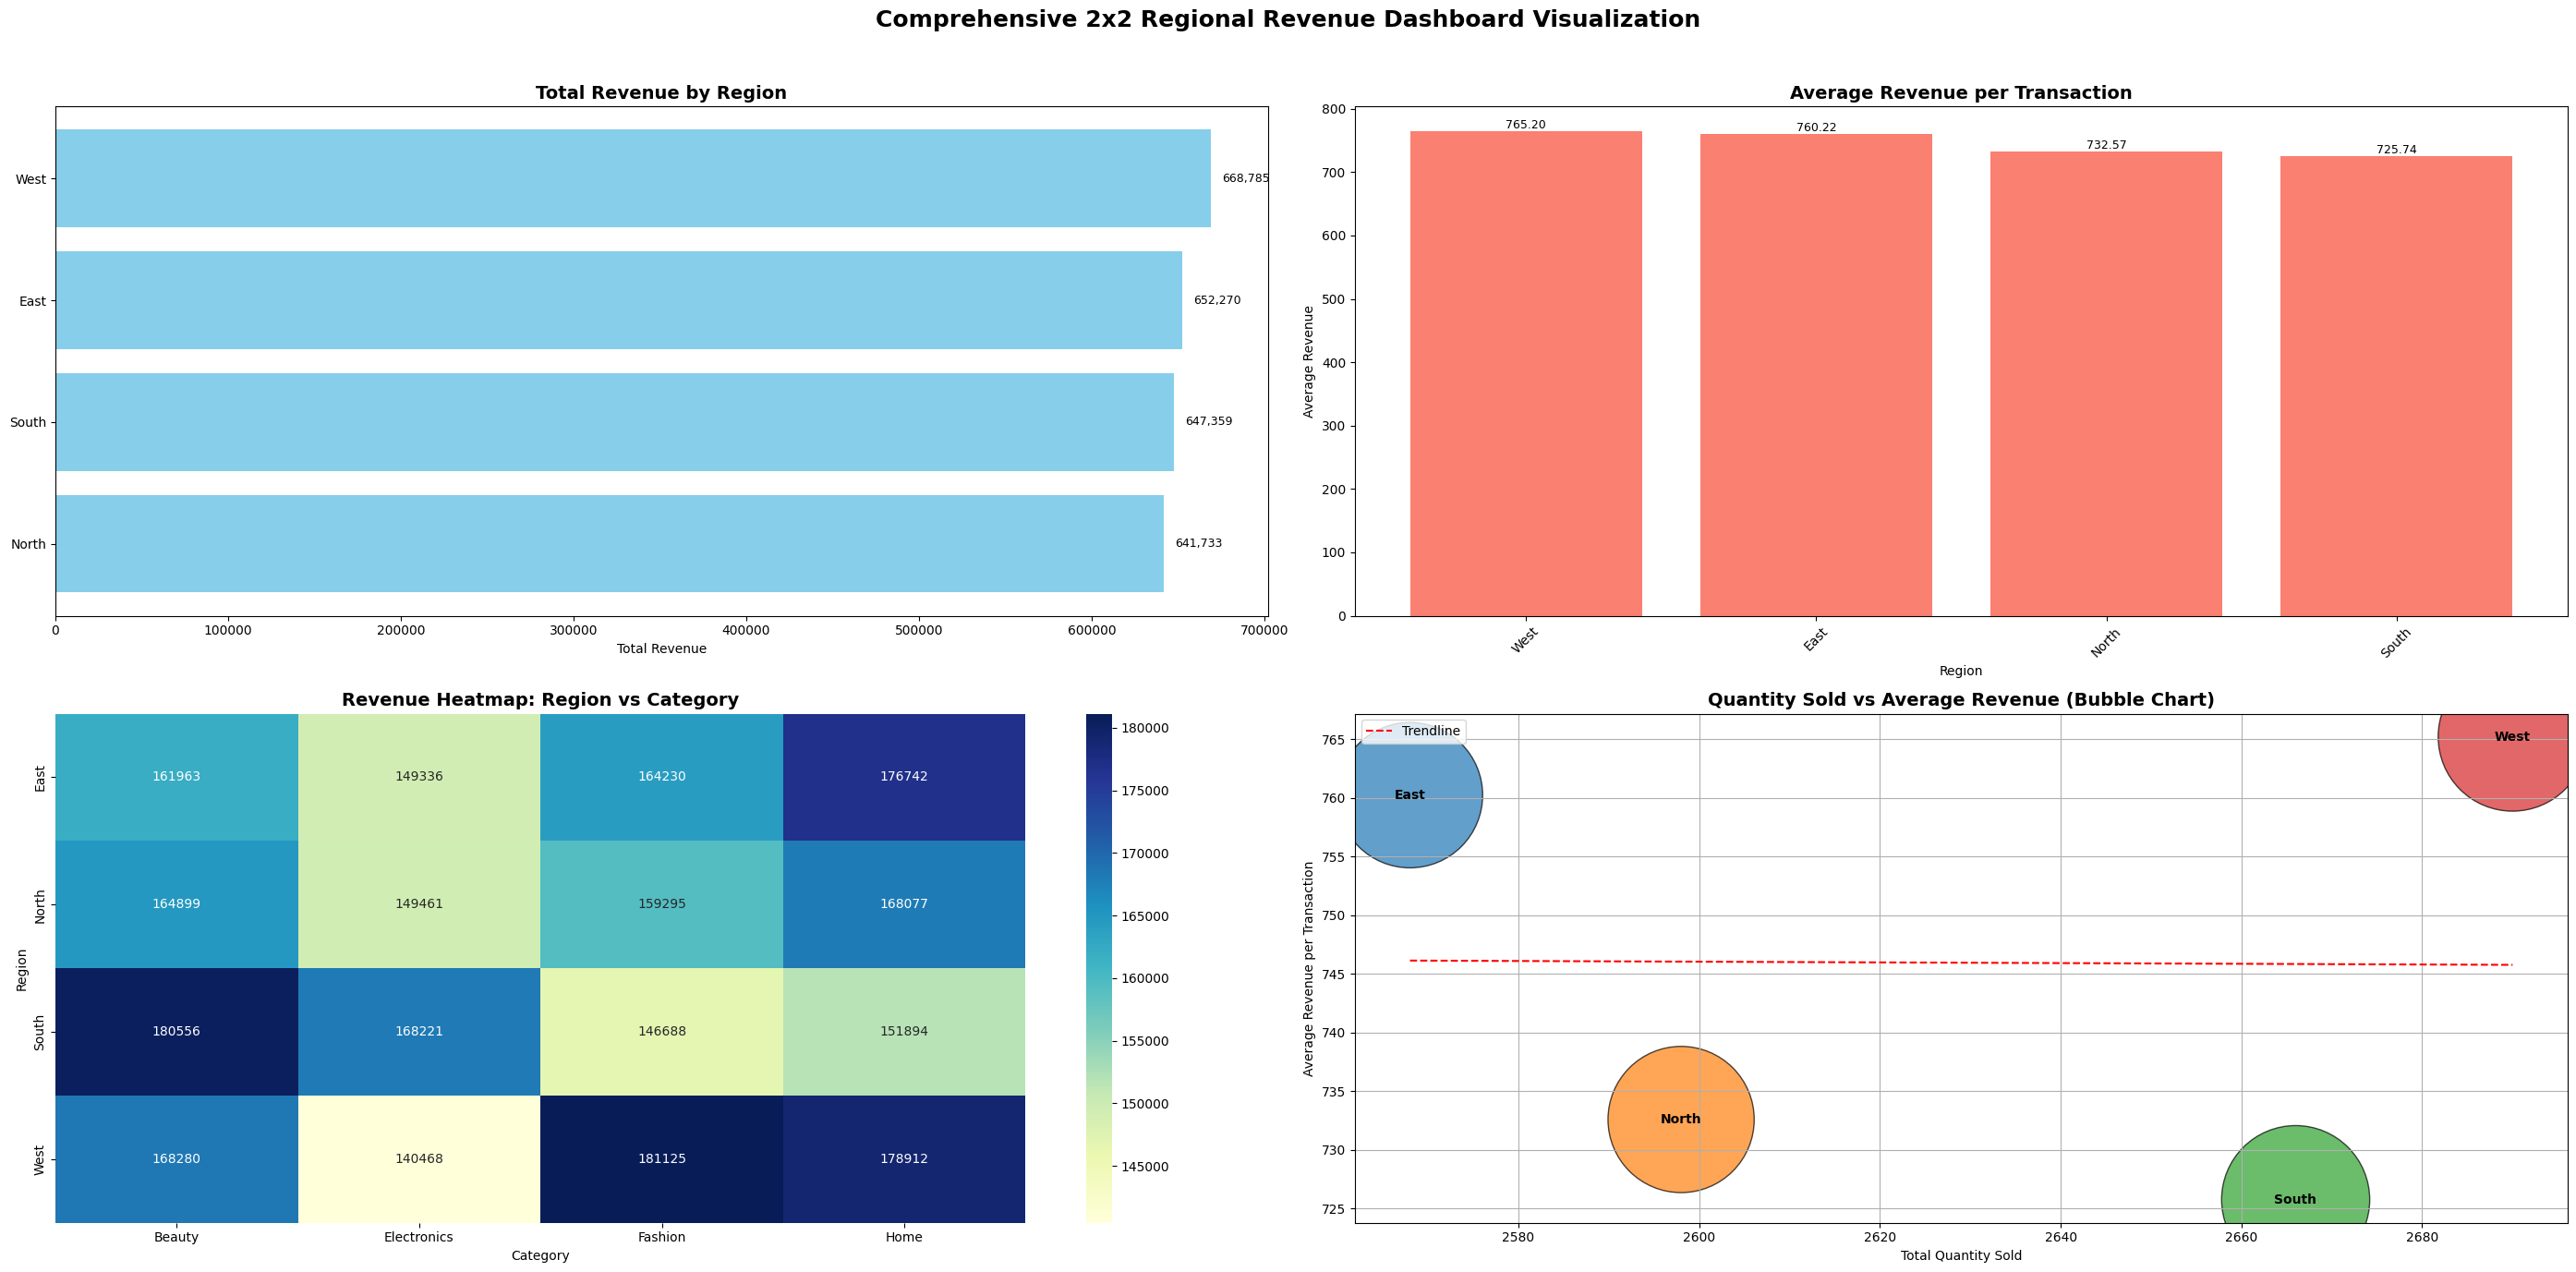

In [20]:
# --- Data Preparation ---
# Total revenue by region
region_revenue = df.groupby('Region')['TotalAmount'].sum().sort_values(ascending=True)

# Average revenue per transaction by region
avg_revenue_region = df.groupby('Region')['TotalAmount'].mean().sort_values(ascending=False)

# Revenue by Region and Category
region_category = df.groupby(['Region', 'Category'])['TotalAmount'].sum().unstack().fillna(0)

# Quantity sold and average revenue per region for bubble chart
region_stats = df.groupby('Region').agg({'Quantity': 'sum', 'TotalAmount': 'mean'}).reset_index()

# Assign colors to regions
colors = sns.color_palette("tab10", len(region_stats))
region_color_map = dict(zip(region_stats['Region'], colors))
bubble_colors = region_stats['Region'].map(region_color_map)

# --- Plotting ---
fig, axes = plt.subplots(2, 2, figsize=(28,14))

# Total Revenue by Region (Horizontal Bar)
bars1 = axes[0,0].barh(region_revenue.index, region_revenue.values, color='skyblue')
axes[0,0].set_title("Total Revenue by Region", fontsize=14, weight='bold')
axes[0,0].set_xlabel("Total Revenue")
for i, v in enumerate(region_revenue.values):
    axes[0,0].text(v + max(region_revenue.values)*0.01, i, f'{v:,.0f}', va='center', fontsize=9)

# Average Revenue per Transaction by Region (Vertical Bar)
bars2 = axes[0,1].bar(avg_revenue_region.index, avg_revenue_region.values, color='salmon')
axes[0,1].set_title("Average Revenue per Transaction", fontsize=14, weight='bold')
axes[0,1].set_xlabel("Region")
axes[0,1].set_ylabel("Average Revenue")
axes[0,1].tick_params(axis='x', rotation=45)
for bar in bars2:
    height = bar.get_height()
    axes[0,1].text(bar.get_x() + bar.get_width()/2, height, f'{height:,.2f}', ha='center', va='bottom', fontsize=9)

# Revenue by Region and Category (Heatmap)
sns.heatmap(region_category, annot=True, fmt='.0f', cmap='YlGnBu', ax=axes[1,0])
axes[1,0].set_title("Revenue Heatmap: Region vs Category", fontsize=14, weight='bold')
axes[1,0].set_xlabel("Category")
axes[1,0].set_ylabel("Region")

# Bubble Chart: Quantity vs Average Revenue per Region
scatter = axes[1,1].scatter(
    region_stats['Quantity'],
    region_stats['TotalAmount'],
    s=region_stats['Quantity']*5,
    c=bubble_colors,
    alpha=0.7,
    edgecolors='black'
)
# Add region labels
for i in range(len(region_stats)):
    axes[1,1].text(
        region_stats['Quantity'][i],
        region_stats['TotalAmount'][i],
        region_stats['Region'][i],
        fontsize=10,
        ha='center',
        va='center',
        weight='bold'
    )

# I did Optional trendline
z = np.polyfit(region_stats['Quantity'], region_stats['TotalAmount'], 1)
p = np.poly1d(z)
axes[1,1].plot(region_stats['Quantity'], p(region_stats['Quantity']), "r--", label="Trendline")

axes[1,1].set_title("Quantity Sold vs Average Revenue (Bubble Chart)", fontsize=14, weight='bold')
axes[1,1].set_xlabel("Total Quantity Sold")
axes[1,1].set_ylabel("Average Revenue per Transaction")
axes[1,1].legend()
axes[1,1].grid(True)

plt.suptitle("Comprehensive 2x2 Regional Revenue Dashboard Visualization", fontsize=18, weight='bold')
plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

Features:

2×2 Layout:

Row 1 → Total Revenue & Average Revenue

Row 2 → Revenue Heatmap & Bubble Chart

Horizontal bar: Quick comparison of total revenue per region.

Vertical bar: Shows average revenue per transaction with value labels.

Heatmap: Highlights strong product categories per region.

Bubble chart: Combines volume vs value, identifying regions with high quantity and/or high-value transactions.Color-coded by region + trendline shows which regions perform best in both volume and revenue.